To understand better PCA we will see another example

This example investigates the arrest made in the USA on 1973

The number of arrest are in multiples of 100.000 except one column UrbanPop which has a percentage of population

In [1]:
import statsmodels.api as sm

us_arrests = sm.datasets.get_rdataset(dataname='USArrests', package='datasets')
print(us_arrests.data.shape)
us_arrests.data.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The PCA method we need to use standard scalar to create a variance of 1 and mean 0

In [2]:
from sklearn.preprocessing import StandardScaler

X = us_arrests.data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
# Lets see how the variance of the data explain the components each time
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.62006039 0.24744129]
0.8675016829223339


In [6]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

The first one:

z1=0,53589947×x1+0,58318363×x2+0,27819087×x3+0,54343209×x4

Second one:

z2=0,41818087×x1+0,1879856×x2−0,87280619×x3−0,16731864×x4

Where:

x1: Murder
x2: Assault
x3: UrbanPop
x4: Rape

One method to visualise PCA is by using biplot



In [13]:
from math import ceil
import matplotlib.pyplot as plt

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
    
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)
    
    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)

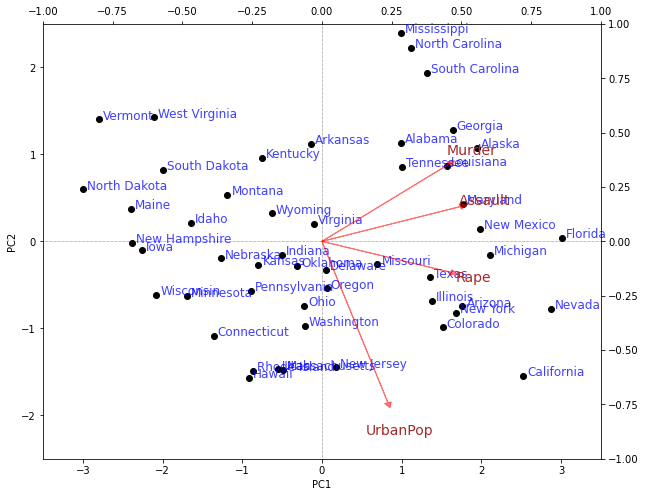

In [14]:
X_proj = pca.fit_transform(X)

biplot(X_proj,
       pca.components_.T,
       us_arrests.data.index,
       us_arrests.data.columns)

We can see from the above plot that UrbanPop contributes 0.27819087 in the first component and -0387280619 in the second

The weight of each component is called loading vector

In [15]:
pca.components_.T

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.27819087, -0.87280619],
       [ 0.54343209, -0.16731864]])